![](../../storage/banners/16_projects.png)

Пары в учебной программе:

- Теормех
- Матан
- Физика: электродинамика
- Физика: мкт, распределения
- Диффуры
- Микроконтроллеры

#### <span style="color:#0ab49a">Кооперация:</span> <span style="color:#A254FC">дилемма заключённого</span> 

#### <span style="color:#0ab49a">Чёрный ящик:</span> <span style="color:#A254FC">параллельное программирование</span> 

##### **Генерация файлика с проекциями**

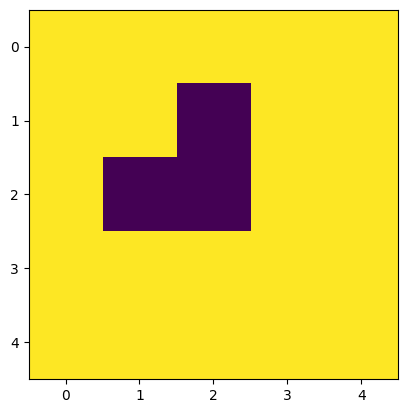

Всего элементов: 5×5=25
Всего вариантов: 2^25 = 33554432


In [1]:
"""
Задача: найти двумерный массив 50×50 (картинку), дающий проекции на оси Ox, Oy. 
Эти проекции известны, вызываются функцией get_noise_projection().
Использовать параллельное программирование для перебора вариантов.
"""

import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

N = 5

m = Image.open("img/003.jpg")
m = m.resize([N, N])
a = np.array(m)
a = [[1 if np.mean(a[i][j]) > 255/2 else 0 for i in range(N)]for j in range(N)]
plt.imshow(a)
plt.show()

print(f"Всего элементов: {N}×{N}={N**2}\nВсего вариантов: 2^{N**2} = {2**(N**2)}")

In [65]:
def save_pic_projection():
    with open("projects/projections.py", "w") as f:
        f.wrtie(f'"""\nСуммы строк и столбцов квадратной матрицы {N}×{N}\n"""')
        f.write(f"x_projection = {[sum([a[i][j] for j in range(N)]) for i in range(N)]}\n")
        f.write(f"y_projection = {[sum([a[j][i] for j in range(N)]) for i in range(N)]}\n")

def save_noise_pic_projection():
    pass

save_pic_projection()

##### **Скелет для студента**

In [ ]:
"""
Рекомендую использовать следующие библиотеки:

Распределение задач на процессоры: p_tqdm
Работа со временем: datetime

Так же импортирован файл projections.py
"""
from p_tqdm import p_map
import datetime
from projections import *


def compare_func(m):
    """Тут два варианта, выбор которых зависит от задачи:
    1. Либо функция сравнивает проекции матрицы m с x_projection, y_projection
    2. Либо функция возвращает модуль разницы векторов проекций m и целевых проекций
    В этой задаче, оба варианта подходят, поскольку они решают идентичные задачи. Если же векторы проекций имеют шум, то корректное 
    решение будет только 2."""


def partial_find_it(a, b, c):
    # Функция, передаваемая на разные процессоры

    # Здесь будет Ваш код!
    
    return a  # О возвращаемом 


def find_it(n_p, ...):
    # Функция, осуществляющая поиск

    # Когда распараллеливается выполнение программы на процессоры, им передаётся одинаковая функция (partial_find_it), и разные аргументы
    # Эти аргументы берутся из длинны 
    t0 = dt.datetime.now()
    anws = p_map(partial_find_it, 
                 [a for i in range(n_p)],
                 [b for i in range(n_p)],
                 [c for i in range(n_p)])
    print(f"Затраченное время: {dt.datetime.now() - t0}")


##### **Решение**

In [2]:
from projects.projections import *
x_projection

[5, 4, 3, 5, 5]

In [ ]:
import datetime as dt
from p_tqdm import p_map

def get_loss(pic: list):
    x_proj = [sum([pic[i][j] for j in range(N)]) for i in range(N)]
    y_proj = [sum([pic[j][i] for j in range(N)]) for i in range(N)]
    return sum([int(x_proj[i]!=x_projection[i]) + int(y_proj[i]!=y_projection[i]) for i in range(N)])

min_loss = 1e10
pic_best = None
def find_it(min_loss, pic_best, N_map):

    def partial_find_it(N_range, min_loss, pic_best):
        for a_dec in range(N_range[0], N_range[1]):
            a_bin = bin(a_dec)[2:].rjust(N**2, "0")
            # Составление картинки
            pic_tmp = [[int(a_bin[i*N + j]) for i in range(N)] for j in range(N)]
    
            # Рассчёт потерь
            loss = get_loss(pic_tmp)
            if min_loss > loss:
                min_loss = loss
                pic_best = pic_tmp
    
        return min_loss, pic_best
        
    t0 = dt.datetime.now()
    anws = p_map(partial_find_it, 
                [(int(num//N_map)*i, int(num//N_map)*(i+1) if (i+1)<N_map else num) for i in range(N_map)],
                [min_loss for i in range(N_map)],
                [pic_best for i in range(N_map)])
    print(f"Затраченное время: {dt.datetime.now() - t0}")
    
    for anw in anws:
        if min_loss > anw[0]:
            min_loss = anw[0]
            pic_best = anw[1]
    return min_loss, pic_best
    

min_loss, pic_best = find_it(min_loss, pic_best, 50)
plt.imshow(pic_best)
plt.show()

#### <span style="color:#0ab49a">Хэш-функции:</span> <span style="color:#A254FC">шифрование и дешифрование</span> 

#### <span style="color:#0ab49a">Задача 3 тел:</span> <span style="color:#A254FC">резонанс кого-то там</span> 

#### <span style="color:#0ab49a">Подопытная мышь:</span> <span style="color:#A254FC">Grid World</span> 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def make_graph(n, m, holes=None):  # список смежности
    graph = dict()
    for i in range(n):
        for j in range(m):
            if [i + 1, j + 1] not in holes:
                graph[m * i + j + 1] = []
                # print(f"{i}:{j} | {[i, j + 1]} -> {[m * i + j + 1]} : {m * (i - 1) + j + 1}")
                # Проверка "над" 
                if [i, j + 1] not in holes and i > 0:
                    graph[m * i + j + 1].append(m * (i - 1) + j + 1)
                if [i + 2, j + 1] not in holes and i + 2 <= n:
                    graph[m * i + j + 1].append(m * (i + 1) + j + 1)
                # Проверка "справа"
                if [i + 1, j] not in holes and j > 0:
                    graph[m * i + j + 1].append(m * i + j)
                if [i + 1, j + 2] not in holes and j + 2 <= m:
                    graph[m * i + j + 1].append(m * i + j + 2)
    return graph

def save_pic(visited, new_layer, rest):
    global save_counter, global_start, global_finish, point_places
    global holes
    global n
    global m
    fig,ax = plt.subplots()
    currentAxis = plt.gca()
    
    point = 0
    for i in range(n):
        for j in range(m):
            point += 1
            color = "gray"
            if point in visited:
                color = "blue"
            if point in new_layer:
                color = "green"
            if list(point_places[point - 1]) in holes:
                color = "black"
            if point in new_layer:
                color = "green"
            if point == global_start:
                color = "white"
            if point == global_finish:
                color = "yellow"
            # plt.text(i + 1.5, j + 1.5, f"{point}", fontsize=10)
            currentAxis.add_patch(Rectangle(point_places[point - 1], 1, 1, alpha=0.5, facecolor=color))

    for point in visited:
        tmp = g_way[point] + [point]
        for i in range(len(tmp) - 1):
            x1, y1 = point_places[tmp[i] - 1]
            x2, y2 = point_places[tmp[i + 1] - 1]
            plt.plot([x1 + 0.5, x2 + 0.5], [y1 + 0.5, y2 + 0.5], c="g")
    if len(rest) == 0:
        point = global_finish
        tmp = g_way[point] + [point]
        for i in range(len(tmp) - 1):
            x1, y1 = point_places[tmp[i] - 1]
            x2, y2 = point_places[tmp[i + 1] - 1]
            plt.plot([x1 + 0.5, x2 + 0.5], [y1 + 0.5, y2 + 0.5], c="y", lw=3)
        
        
    save_counter += 1
    ax.set_xlim([1, n + 1])
    ax.set_ylim([1, m + 1])
    plt.axis('off')
    # plt.show()
    plt.savefig(f"projects/img/{str(save_counter).rjust(4, '0')}.jpg")

def dfs_my(graph, start):
    visited = set()
    visited.add(start)
    rest = set(graph.keys()) - visited
    new_layer = set(graph[start])
    while len(rest) > 0:
        # print(f"new_layer: {new_layer}")
        for nxt in new_layer:
            min_path_and_len = [None, 1e10]
            for i in visited:
                if nxt in graph[i]:
                    tmp = [g_way[i] + [i], g_len[i] + 1]
                    if tmp[1] < min_path_and_len[1]:
                        min_path_and_len = tmp
            if min_path_and_len[1] < g_len[nxt]:
                g_len[nxt] = min_path_and_len[1]
                g_way[nxt] = min_path_and_len[0]
        
        tmp_layer = set()
        for i in new_layer:
            visited.add(i)
            for j in graph[i]:
                tmp_layer.add(j)
        new_layer = tmp_layer - visited

        rest = set(graph.keys()) - visited

        # Отображение
        save_pic(visited, new_layer, rest)
    for _ in range(5):
        save_pic(visited, new_layer, rest)

global_start = 1
global_finish = 150
print(f"Начальная точка: {global_start}\n")

n, m = 10, 15
point_places = []
for i in range(n):
    for j in range(m):
        point_places.append((i+1, j+1))

holes = []
h = [2, 17, 46, 62, 65, 50, 35, 20, 37, 38, 92, 93, 94, 95, 96, 97, 108, 123, 80, 126, 142, 68, 69, 70, 85, 100, 
    115, 130, 147, 132, 117, 102, 87, 72, 57, 10, 25, 8, 58, 45, 14, 88, 89, 134, 135]
for point in h:
    holes.append(list(point_places[point - 1]))

g = make_graph(n, m, holes)
g_way = {i: [] for i in g.keys()}
g_len = {i: 0 if i == global_start else 1e10 for i in g.keys()}

counter = 0
print("-"*4*m)
for i in range(n):
    for j in range(m):
        counter += 1
        print("####" if [i+1, j+1] in holes else str(counter).ljust(3).rjust(4), end='')
    print()
print("-"*4*m)
print()

save_counter = 0
dfs_my(g, global_start)

print(f"До узла {global_finish} шага(ов) {g_len[global_finish]}: {'-'.join(map(str, g_way[global_finish]))}->{global_finish}")

In [4]:
from collections import deque


def make_graph(n, m, holes=None):  # список смежности
    graph = dict()
    for i in range(n):
        for j in range(m):
            if [i + 1, j + 1] not in holes:
                graph[m * i + j + 1] = []
                if [i, j + 1] not in holes and i > 0:
                    graph[m * i + j + 1].append(m * (i - 1) + j + 1)
                if [i + 2, j + 1] not in holes and i + 2 <= n:
                    graph[m * i + j + 1].append(m * (i + 1) + j + 1)
                if [i + 1, j] not in holes and j > 0:
                    graph[m * i + j + 1].append(m * i + j)
                if [i + 1, j + 2] not in holes and j + 2 <= m:
                    graph[m * i + j + 1].append(m * i + j + 2)
    return graph


def dfs(graph, start, finish, visited=None, found=False, ans=None):
    if ans is None:
        ans = []
    if start == finish and not found:
        found = True
        if str(start) not in ans:
            ans.append(str(start))
    if visited is None:
        visited = set()
    visited.add(start)
    if not found and str(finish) not in ans:
        ans.append(str(start))
        for next in set(graph[start]) - visited:
            dfs(graph, next, finish, visited, found, ans)
    return ans


def bfs(graph, start, finish, visited=None, queue=None, prev=None, ans=None):
    if ans is None:
        ans = []
    if prev is None:
        prev = dict()
    if visited is None:
        visited = set()
    if queue is None:
        queue = deque()
    visited.add(start)
    queue.append(start)
    if str(finish) not in ans:
        ans.append(str(start))
        while queue:
            m = queue.popleft()
            if m == finish:
                ans.append(m)
                break
            ans.append(m)
            for neighbour in graph[m]:
                if neighbour not in visited:
                    prev[neighbour] = m
                    visited.add(neighbour)
                    queue.append(neighbour)
    return prev

######################################### Мой код
n, m = 10, 15
point_places = []
for i in range(n):
    for j in range(m):
        point_places.append((i+1, j+1))

holes = []
h = [2, 17, 46, 62, 65, 50, 35, 20, 37, 38, 92, 93, 94, 95, 96, 97, 108, 123, 80, 126, 142, 68, 69, 70, 85, 100, 
    115, 130, 147, 132, 117, 102, 87, 72, 57, 10, 25, 8, 58, 45, 14, 88, 89, 134, 135]
for point in h:
    holes.append(list(point_places[point - 1]))
start_y, start_x = 1, 1
#########################################

print('Поле:')
print('-' * (len(str(n * m)) + 1) * m)
for i in range(n):
    for j in range(m):
        if [i + 1, j + 1] in holes:
            print('#' * (len(str(n * m))), end=' ')
        else:
            d = str(m * i + j + 1)
            print(' ' * (len(str(n * m)) - len(d)) + d, end=' ')
    print()
print('-' * (len(str(n * m)) + 1) * m)
if [start_x, start_y] in holes:
    raise Exception('Start can`t be in a hole!')

g = make_graph(n, m, holes)
start = m * (start_x - 1) + start_y
print('---bfs---')
for i in range(n):
    for j in range(m):
        finish = m * i + j + 1
        if [i + 1, j + 1] not in holes:
            print('До узла', finish, end=' ')
            ans = bfs(g, start, finish)
            way = [str(finish)]
            steps = 1
            now = finish
            while now != start:
                now = ans[now]
                steps += 1
                way.append(str(now))
            way = way[::-1]
            if steps % 10 in [2, 3, 4] and steps // 10 % 10 != 1:
                print('(', steps, ' шага): ', sep='', end='')
            elif steps % 10 == 1 and steps // 10 % 10 != 1:
                print('(', steps, ' шаг): ', sep='', end='')
            else:
                print('(', steps, ' шагов): ', sep='', end='')
            print(' -> '.join(way))


Поле:
------------------------------------------------------------
  1 ###   3   4   5   6   7 ###   9 ###  11  12  13 ###  15 
 16 ###  18  19 ###  21  22  23  24 ###  26  27  28  29  30 
 31  32  33  34 ###  36 ### ###  39  40  41  42  43  44 ### 
###  47  48  49 ###  51  52  53  54  55  56 ### ###  59  60 
 61 ###  63  64 ###  66  67 ### ### ###  71 ###  73  74  75 
 76  77  78  79 ###  81  82  83  84 ###  86 ### ### ###  90 
 91 ### ### ### ### ### ###  98  99 ### 101 ### 103 104 105 
106 107 ### 109 110 111 112 113 114 ### 116 ### 118 119 120 
121 122 ### 124 125 ### 127 128 129 ### 131 ### 133 ### ### 
136 137 138 139 140 141 ### 143 144 145 146 ### 148 149 150 
------------------------------------------------------------
---bfs---
До узла 1 (1 шаг): 1
До узла 3 (7 шагов): 1 -> 16 -> 31 -> 32 -> 33 -> 18 -> 3
До узла 4 (8 шагов): 1 -> 16 -> 31 -> 32 -> 33 -> 18 -> 3 -> 4
До узла 5 (9 шагов): 1 -> 16 -> 31 -> 32 -> 33 -> 18 -> 3 -> 4 -> 5
До узла 6 (10 шагов): 1 -> 16 -> 31 -> 32 

**Код студента**

#### <span style="color:#0ab49a">Gym:</span> <span style="color:#A254FC">двойной маятник</span> 

In [89]:
import gymnasium as gym

env = gym.make("CartPole-v1")
observation_space = env.observation_space.shape[0]
action_space = env.action_space.n   

terminal_state = False
state = env.reset()
# state = np.reshape(state, [1, observation_space])  

while True:
    #env.render()
    # action = dqn_solver.act(state)
    action = np.random.randint(2)
    # print(env.step(action))
    state_next, reward, terminal, info, _ = env.step(action)
    state = np.reshape(state_next, [1, observation_space])
    # print(state)
    print(state[0])
      
    if terminal:
        break

[ 0.02830734 -0.15921979  0.03777779  0.29856065]
[ 0.02512294 -0.3548593   0.043749    0.6029146 ]
[ 0.01802576 -0.550565    0.0558073   0.9090503 ]
[ 0.00701446 -0.74639606  0.0739883   1.2187384 ]
[-0.00791346 -0.5523018   0.09836307  0.9501264 ]
[-0.0189595  -0.35863167  0.1173656   0.6898975 ]
[-0.02613213 -0.5551698   0.13116355  1.017103  ]
[-0.03723553 -0.7517733   0.1515056   1.3479266 ]
[-0.052271   -0.5588451   0.17846414  1.1062218 ]
[-0.0634479  -0.36646023  0.20058857  0.8744182 ]
[-0.0707771  -0.5636609   0.21807694  1.2228667 ]


In [86]:
state

array([[ 0.14828601,  1.3443959 , -0.22132792, -2.122732  ]],
      dtype=float32)

In [78]:
env.observation_space.low

array([-4.8000002e+00, -3.4028235e+38, -4.1887903e-01, -3.4028235e+38],
      dtype=float32)

In [ ]:
dir(env.observation_space.high)